# Table of Contents
 <p><div class="lev1 toc-item"><a href="#AED" data-toc-modified-id="AED-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AED</a></div><div class="lev2 toc-item"><a href="#DESCRIPCIÓN" data-toc-modified-id="DESCRIPCIÓN-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DESCRIPCIÓN</a></div><div class="lev2 toc-item"><a href="#RELACIONES" data-toc-modified-id="RELACIONES-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RELACIONES</a></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

# formato de los gráficos
plt.style.use(['seaborn-white', 'seaborn-paper'])
set_matplotlib_formats('svg', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = u"\\usepackage{subdepth}, \\usepackage{type1cm}"

In [3]:
%matplotlib inline

# AED

ANALISIS EXPLORATORIO DE LOS DATOS

In [4]:
# datos
data = pd.read_excel("../data/rto_por_torneo.xlsx")
data.head()

,torneo,partidos,rto,lay,ganador,p_g,porc,porc_lay
0,"ATP - DOBLES: Atlanta (USA), dura",19,19.82,16.25,Favorito,3.57,104.32,85.53
1,"ATP - DOBLES: Bastad (Suecia), arcilla",15,14.57,10.72,Favorito,3.85,97.13,71.47
2,"ATP - DOBLES: Chengdu (China), dura",12,9.74,21.36,Lay,-11.62,81.17,178.00
3,ATP - DOBLES: Copa Davis (Mundial) - Descenso,6,2.44,20.83,Lay,-18.39,40.67,347.17
4,ATP - DOBLES: Copa Davis Grupo I (Mundial),8,5.39,23.33,Lay,-17.94,67.38,291.62


In [5]:
data.columns = "tournament games yield lay win pg rate ratelay".split()
data.head()

,tournament,games,yield,lay,win,pg,rate,ratelay
0,"ATP - DOBLES: Atlanta (USA), dura",19,19.82,16.25,Favorito,3.57,104.32,85.53
1,"ATP - DOBLES: Bastad (Suecia), arcilla",15,14.57,10.72,Favorito,3.85,97.13,71.47
2,"ATP - DOBLES: Chengdu (China), dura",12,9.74,21.36,Lay,-11.62,81.17,178.00
3,ATP - DOBLES: Copa Davis (Mundial) - Descenso,6,2.44,20.83,Lay,-18.39,40.67,347.17
4,ATP - DOBLES: Copa Davis Grupo I (Mundial),8,5.39,23.33,Lay,-17.94,67.38,291.62


## DESCRIPCIÓN

In [6]:
data.describe()

,games,yield,lay,pg,rate,ratelay
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,24.433566,20.078438,31.716573,-11.638135,79.195758,137.931235
std,17.202570,15.697070,23.191386,17.413629,21.073094,64.376734
min,5.000000,0.000000,1.900000,-118.040000,0.000000,15.830000
25%,13.000000,9.870000,16.600000,-18.700000,68.070000,96.400000
50%,24.000000,18.700000,26.460000,-8.680000,81.170000,124.800000
75%,30.000000,26.740000,39.450000,-1.210000,92.820000,168.650000
max,139.000000,131.580000,160.160000,24.510000,140.800000,545.250000


## RELACIONES

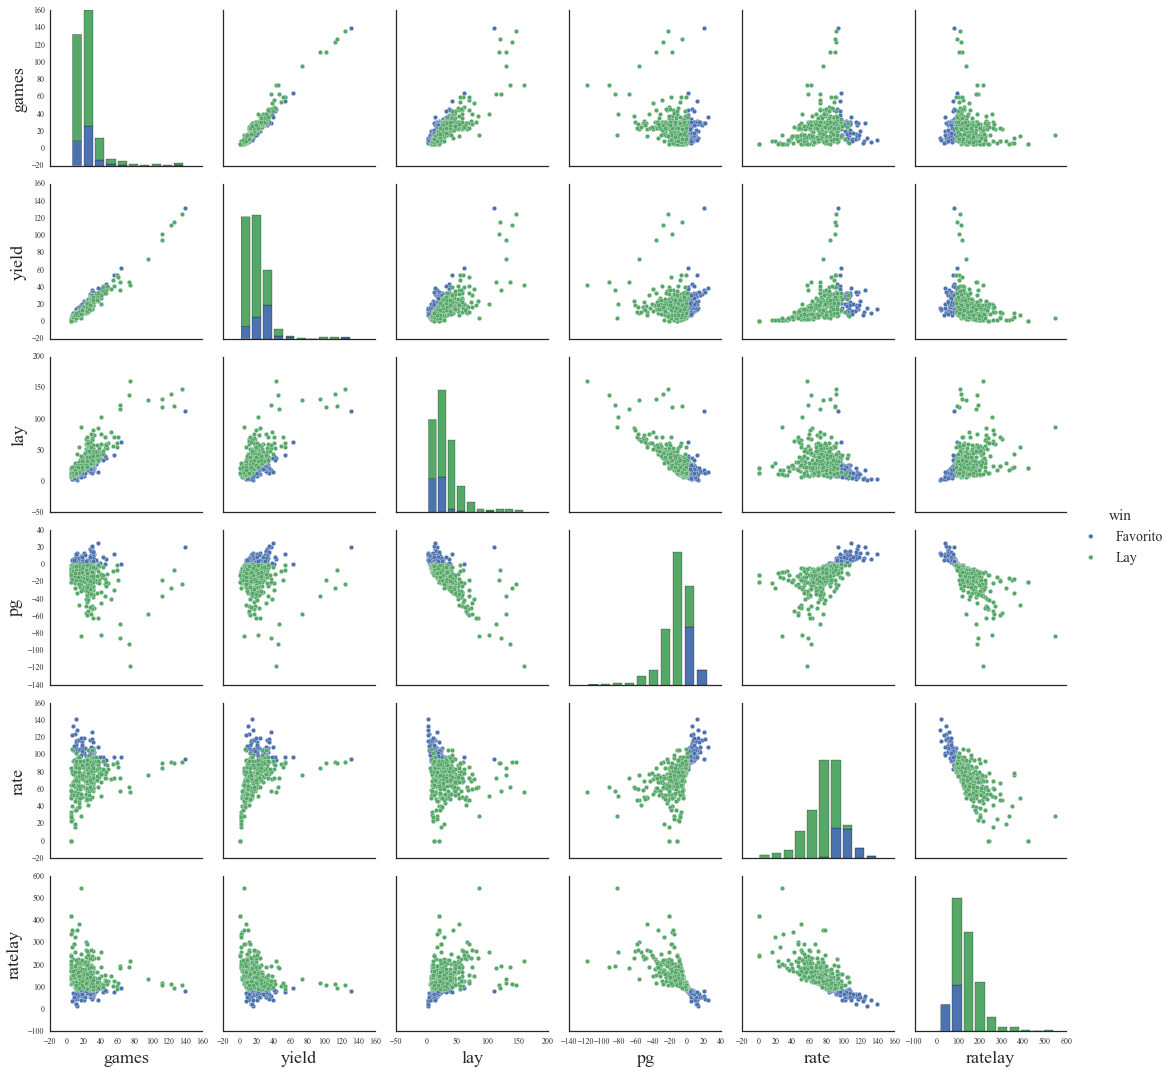

In [7]:
sns.pairplot(data=data, hue="win")

/Users/mmngreco/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


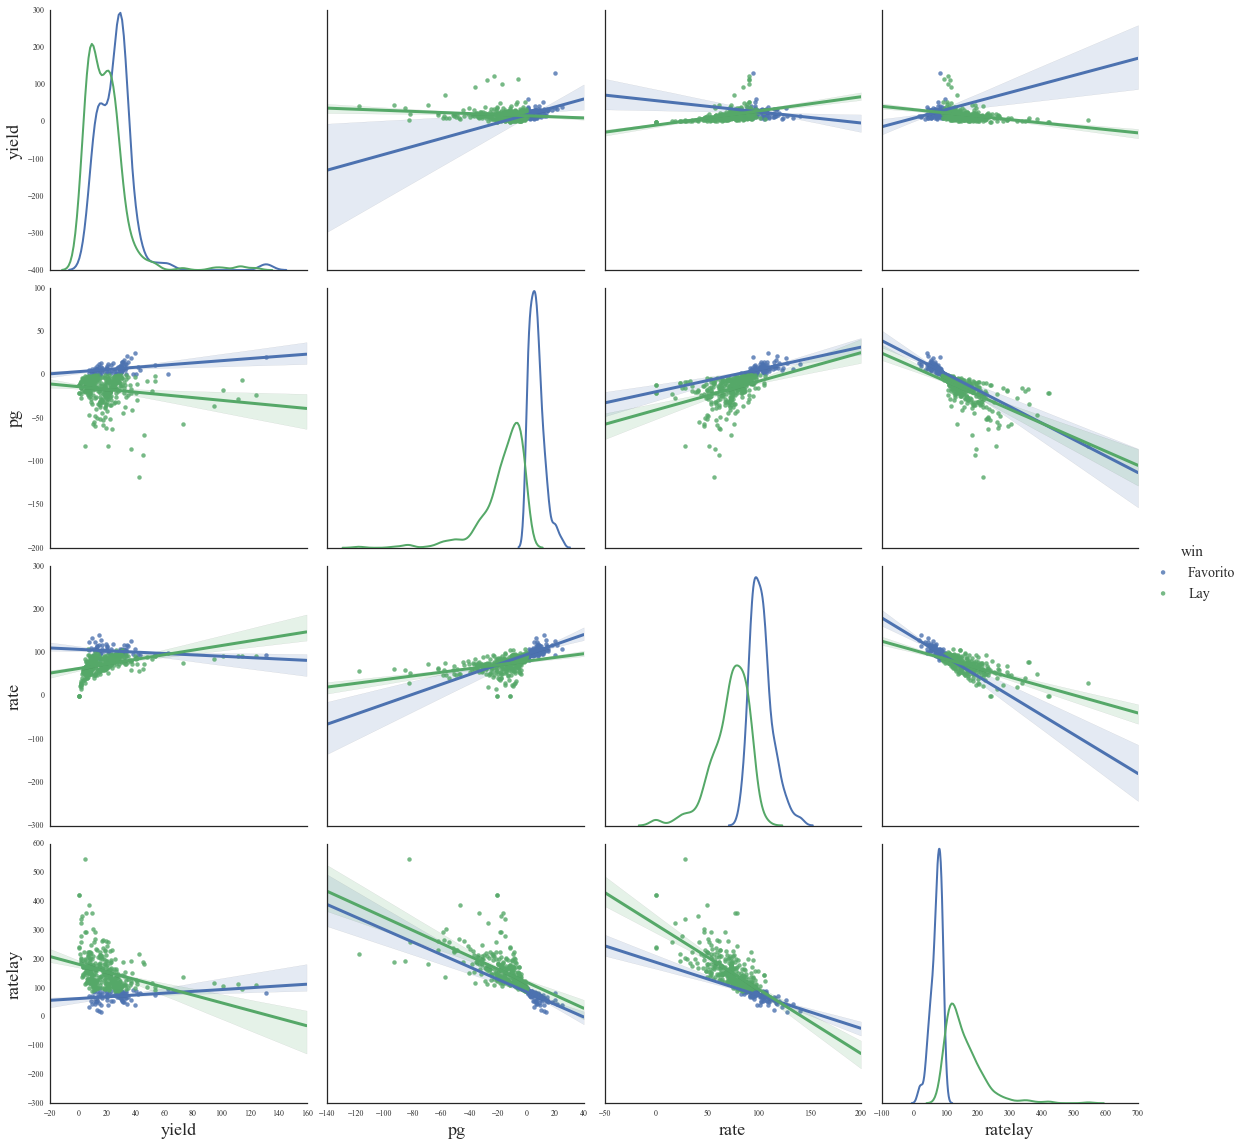

In [12]:
sns.pairplot(data=data, 
             hue="win", 
             vars="yield pg rate ratelay".split(), 
             kind="reg",
             diag_kind="kde",
             size=4)

In [21]:
data["binarywin"] = (data.loc[:,"win"] == "Favorito") * 1

/Users/mmngreco/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


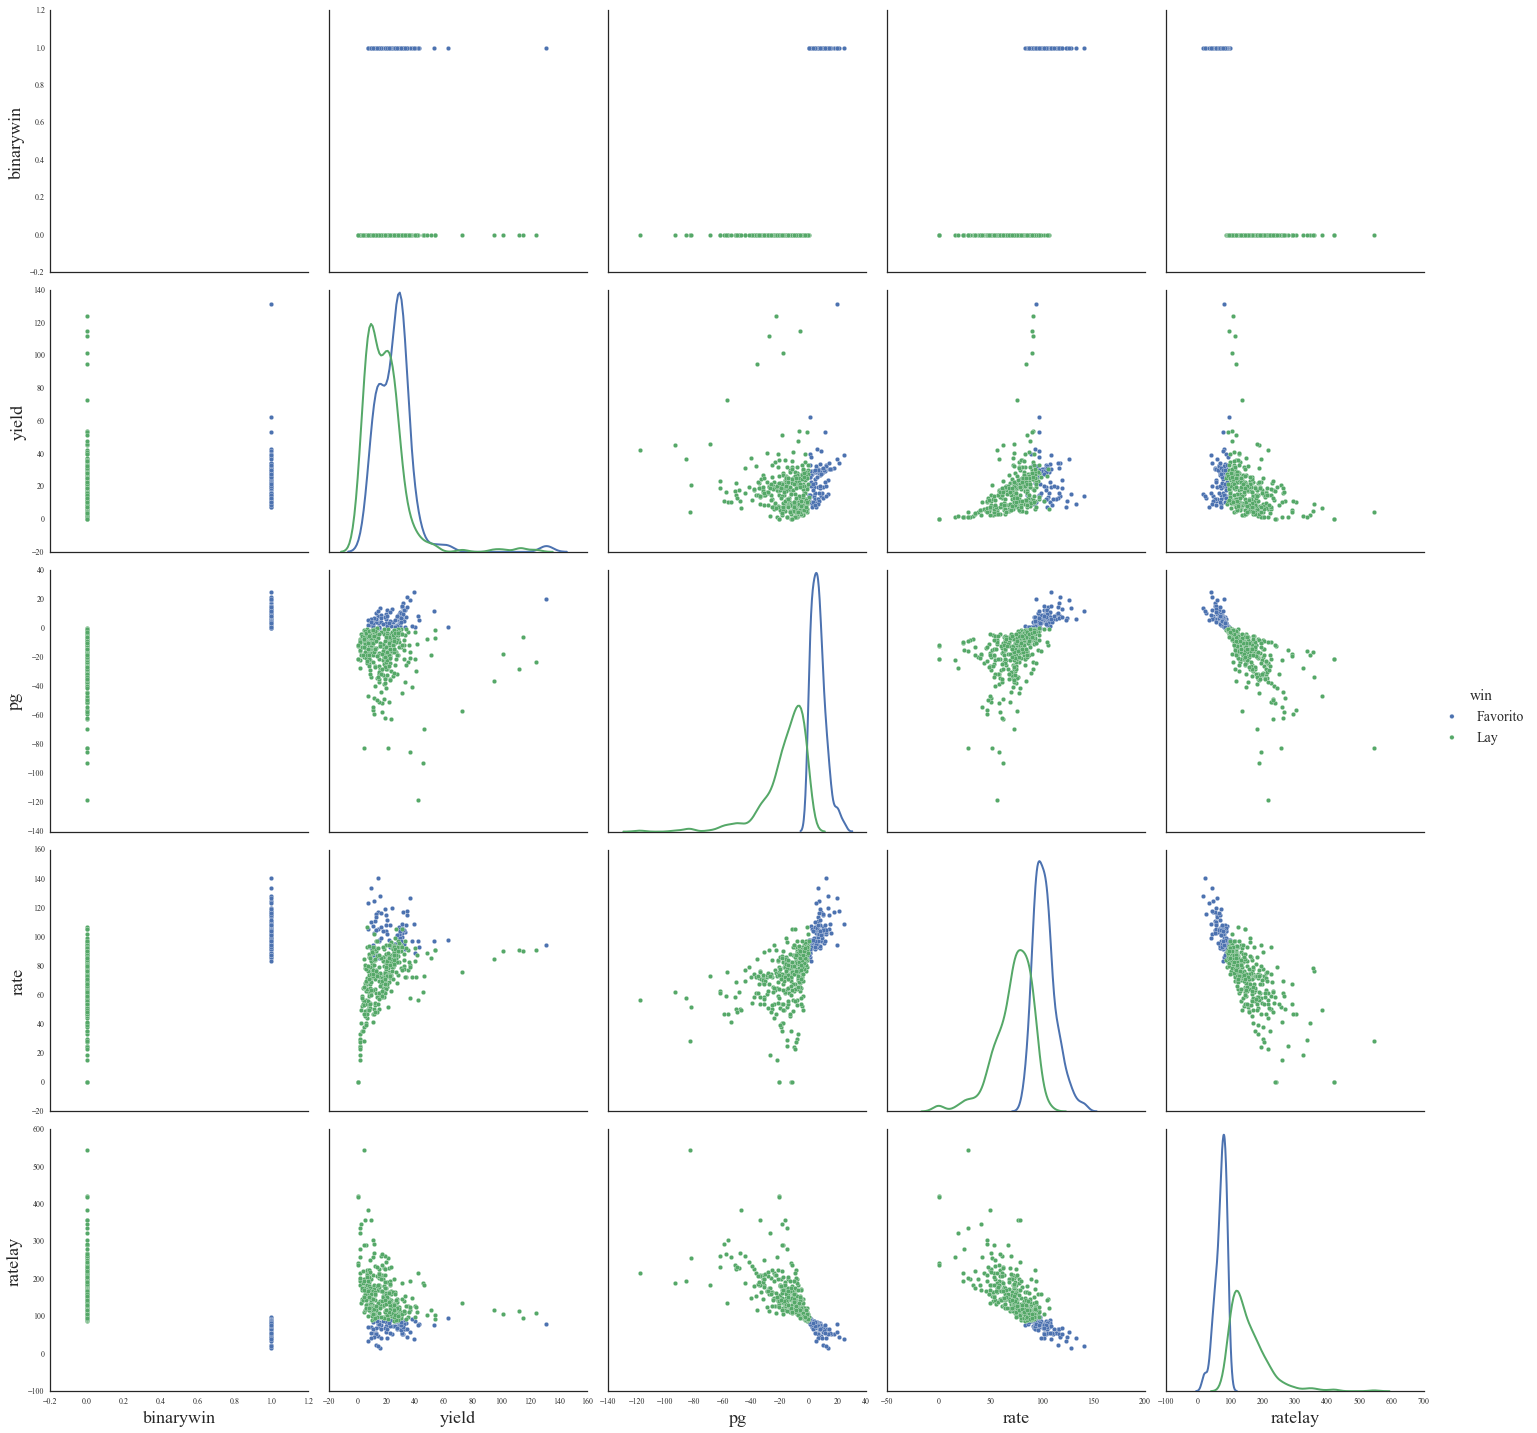

In [23]:
sns.pairplot(data=data, 
             hue="win", 
             vars="binarywin yield pg rate ratelay".split(),
             diag_kind="kde",
             size=4)